# PyTorch: Regression

This notebook uses pytorch to solve a regression problem. `data/x_reg.txt` contains the inputs and `data/y_reg.txt` contains the labels.  

Importing the relevant modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

Loading data from `x_reg.txt` and `y_reg.txt` and creating two numpy arrays, `x` and `y`, containing the respective data. 

In [2]:
# Load data
x = np.loadtxt('data/x_reg.txt')
y = np.loadtxt('data/y_reg.txt')

Plotting the data: `y` vs `x`.

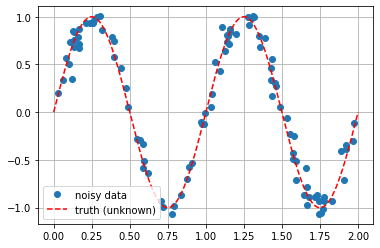

In [3]:
# Visualize the data
plt.plot(x, y, 'o', label='noisy data')
linsp = np.linspace(0,2,1000)
plt.plot(linsp, np.sin(2*np.pi* linsp), '--r', label='truth (unknown)')
plt.legend()
plt.grid()

Converting numpy arrays into torch.tensors and createíng a dataset using torch.utils.data.TensorDataset(inputs,targets).

In [4]:
# convert x_D, y_D to tensors
y_t = torch.tensor(y.T).float().reshape(-1, 1)
x_t = torch.tensor(x.T).float().reshape(-1, 1)
# build a data set
batch_size = x.size
dataloader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_t, y_t),
                                             batch_size=batch_size)

Defining the NN.

In [5]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(1, 8)
        self.relu1 = nn.ReLU()
        self.lin2 = nn.Linear(8, 8)
        self.relu2 = nn.ReLU()
        self.lin3 = nn.Linear(8,8)
        self.relu3 = nn.ReLU()
        self.lin4 = nn.Linear(8,1)


    def forward(self, y):
        y = self.relu1(self.lin1(y))
        y = self.relu2(self.lin2(y))
        y = self.relu3(self.lin3(y))
        return self.lin4(y)

Initializing the network and plotting output before training vs the desired output.

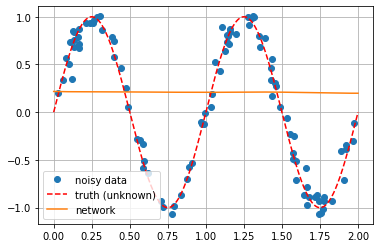

In [6]:
# initialize the network
torch.manual_seed(5)
net = Net()
# plot the network output before training
linspace_t = torch.tensor(linsp.reshape(-1,1)).float()
y_hat = net(linspace_t).detach().numpy()
plt.plot(x, y, 'o', label='noisy data')
plt.plot(linsp, np.sin(2*np.pi* linsp), '--r', label='truth (unknown)')
plt.plot(linsp, y_hat, label='network')
plt.legend()
plt.grid()

Function to train the NN.

In [7]:
def train(NeuralNetwork,dataloader,loss_function, num_epochs, lr=0.001):
    """
    NeuralNetwork = neural network to be trained
    dataloader = DataLoader that deals batches for mini-batch learning
    loss_function = cost function to be optimized
    num_epochs = number of training epochs
    lr = learning rate (default value 0.001)
    """
    optimizer = torch.optim.SGD(NeuralNetwork.parameters(), lr = lr)
    for epoch in range(num_epochs):
        for inputs,labels in dataloader:
            # forward propagation
            outputs = NeuralNetwork(inputs)
            # compute loss
            loss = loss_function(outputs, labels)
            # reset gradient
            optimizer.zero_grad()
            # backprop
            loss.backward()
            # update parameters
            optimizer.step()

        if (epoch % 1000) == 0:
            print('Epoch: ',epoch, 'Loss: ', loss.detach().numpy())
    

Training the NN.

In [8]:
torch.manual_seed(5)
net = Net()
train(net,dataloader,nn.MSELoss(),10000, 0.1)

Epoch:  0 Loss:  0.49278772
Epoch:  1000 Loss:  0.03176805
Epoch:  2000 Loss:  0.011802234
Epoch:  3000 Loss:  0.010936284
Epoch:  4000 Loss:  0.016073799
Epoch:  5000 Loss:  0.016069584
Epoch:  6000 Loss:  0.012563362
Epoch:  7000 Loss:  0.012816081
Epoch:  8000 Loss:  0.009905194
Epoch:  9000 Loss:  0.010646058


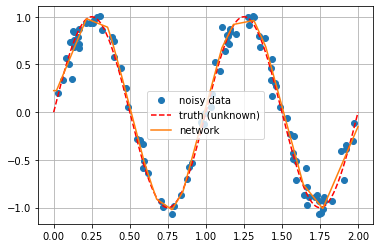

In [9]:
# visualization
y_hat = net(torch.tensor(linsp.reshape(-1,1)).float()).detach().numpy()
plt.plot(x, y, 'o', label='noisy data')
plt.plot(linsp, np.sin(2*np.pi* linsp), '--r', label='truth (unknown)')
plt.plot(linsp, y_hat, label='network')
plt.legend()
plt.grid()